In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [27]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [28]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
students_df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [31]:
students_df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

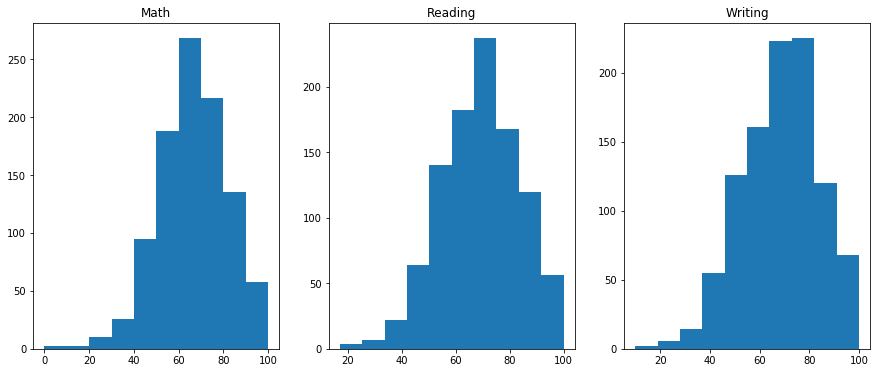

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(students_df['math score'])
plt.title('Math')

plt.subplot(1,3,2)
plt.hist(students_df['reading score'])
plt.title('Reading')

plt.subplot(1,3,3)
plt.hist(students_df['writing score'])
plt.title('Writing')

plt.show()

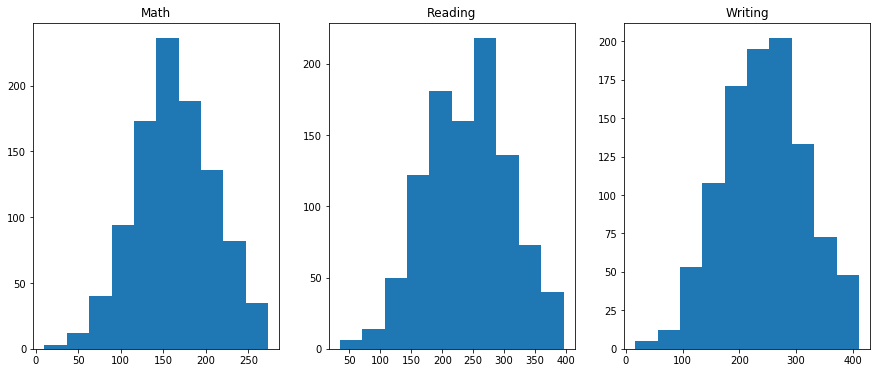

In [33]:
from scipy.stats import boxcox

math_box,_ = boxcox(students_df[students_df["math score"] > 0]["math score"])
reading_box,_ = boxcox(students_df['reading score'])
writing_box,_ = boxcox(students_df['writing score'])

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(math_box)
plt.title('Math')

plt.subplot(1,3,2)
plt.hist(reading_box)
plt.title('Reading')

plt.subplot(1,3,3)
plt.hist(writing_box)
plt.title('Writing')

plt.show()


After the boxcox transformation, the data doesn't appear to look that different from the original distributions.

In [35]:
students_df['Avg Score'] = (students_df['math score'] + students_df['reading score'] + students_df['writing score']) / 3


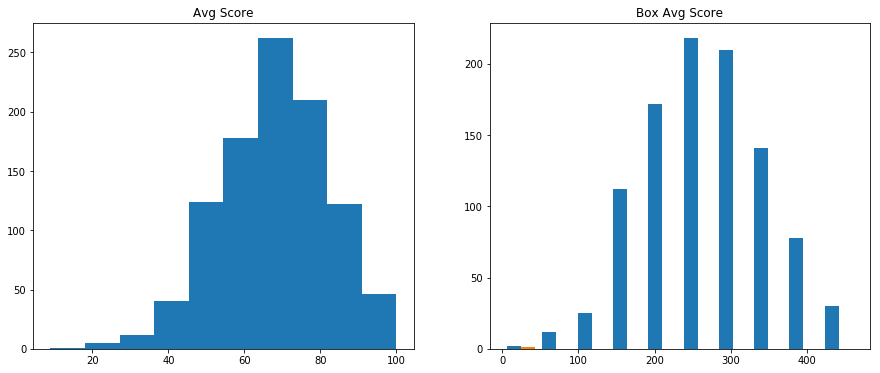

In [45]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(students_df['Avg Score'])
plt.title('Avg Score')


plt.subplot(1,2,2)
box_avg = boxcox(students_df['Avg Score'])
plt.hist(box_avg)
plt.title('Box Avg Score')
plt.show()


Why does my box plot look like that?

In [46]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [48]:
jb_stats = jarque_bera(students_df['Avg Score'])
norm_stats = normaltest(students_df['Avg Score'])
print(jb_stats)
print(norm_stats)

(15.453387913085168, 0.00044089934264401887)
NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)


In [49]:
jb_stats = jarque_bera(box_avg)
norm_stats = normaltest(box_avg)
print(jb_stats)
print(norm_stats)

ValueError: operands could not be broadcast together with shapes (2,) (1000,) 

I think I am getting this error due to the strange distribution of my boxplot. Would like to get feedback on what I did wrong here.

In [50]:
students_df.corr()

,math score,reading score,writing score,Avg Score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
Avg Score,0.918746,0.970331,0.965667,1.000000


The variable that looks most closely correlated with Avg Score is the reading, and also writing scores. I can also see how whether or not the student completed the practice exams could be a useful determinator for overall success. Let's take a further look.

<BarContainer object of 2 artists>

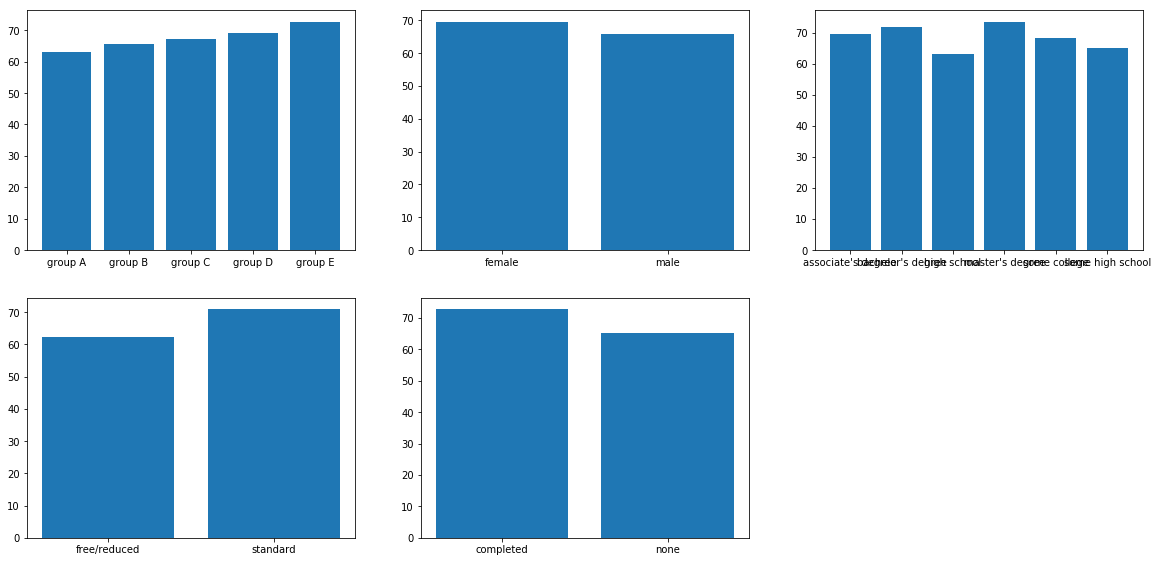

In [56]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.bar(students_df.groupby("race/ethnicity")
        ["Avg Score"].mean().index, students_df.groupby("race/ethnicity")["Avg Score"].mean())

plt.subplot(3,3,2)
plt.bar(students_df.groupby('gender')
        ['Avg Score'].mean().index, students_df.groupby('gender')['Avg Score'].mean())

plt.subplot(3,3,3)
plt.bar(students_df.groupby('parental level of education')
        ['Avg Score'].mean().index, students_df.groupby('parental level of education')['Avg Score'].mean())

plt.subplot(3,3,4)
plt.bar(students_df.groupby('lunch')
        ['Avg Score'].mean().index, students_df.groupby('lunch')['Avg Score'].mean())

plt.subplot(3,3,5)
plt.bar(students_df.groupby('test preparation course')
        ['Avg Score'].mean().index, students_df.groupby('test preparation course')['Avg Score'].mean())

As expected, students that completed the pretest performed better. People with standard lunch did better, while females outperformed males. It looks as though all of these variables could be used to determine success.